<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 19**

## **Contenido**

- <a href="#svm"> SVM Lineal</a><br>
  - <a href="#svm"> Clasificador lineal de margen fuerte</a><br>
  - <a href="#svm"> Clasificador lineal de margen suave</a><br>
- <a href="#svm"> SVM no Lineal</a><br>
  - <a href="#svm"> Problema dual</a><br>
  - <a href="#svm"> SVM con kernel</a><br>

<p><a name="svm"></a></p>

# **SVM**

Una máquina de vectorial de soporte (SVM) es un modelo de aprendizaje automático muy potente y versátil, capaz de realizar clasificaciones y regresiones lineales o no lineales. Tiene además una base teórica muy sólida que, en contraste con otro tipo de clasificadores, como por ejemplo las redes neuronales, nos permite conocer detalladamente cada paso en el proceso de clasificación.



## **Clasificador lineal de margen fuerte**

Para comenzar, vamos a considerar este conjunto de datos, que es totalmente separable linealmente. 

Sabemos que la frontera de decisión está dada por $$W^T \cdot X = 0$$ la cual define una línea (en general un hiperplano) ¿Qué línea deberíamos elegir?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

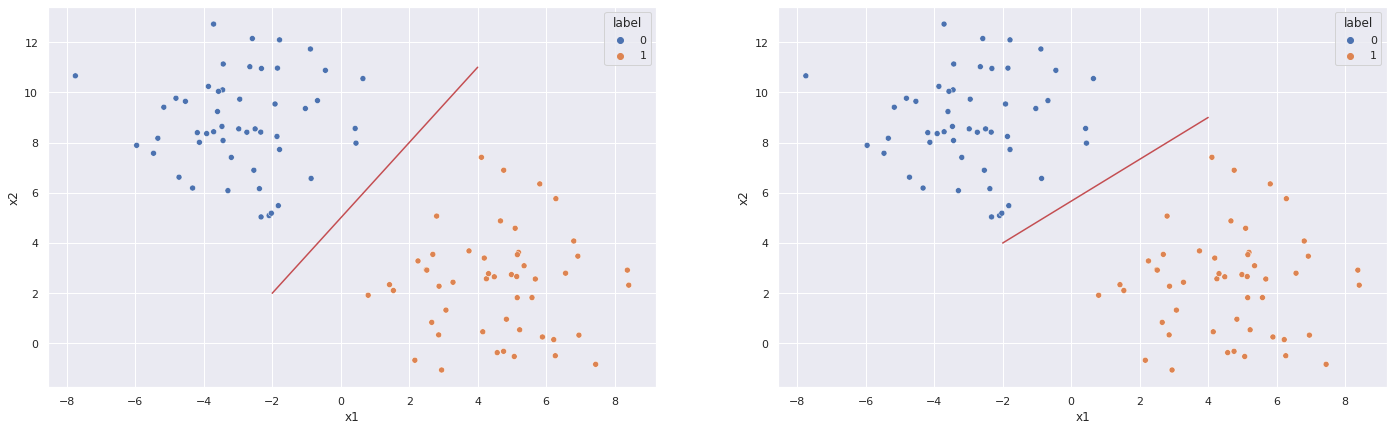

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2, random_state=42)

df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))

fig, ax = plt.subplots(1, 2, figsize = (24, 7))
sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'label', ax = ax[0])
ax[0].plot([-2, 4], [2, 11], 'r')
sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'label', ax = ax[1])
ax[1].plot([-2, 4], [4, 9], 'r');


El margen $m$ está definido como la distancia entre las dos líneas paralelas que pasan por los puntos de las instancias más interiores, que están definidas por $$W^T \cdot X = \pm 1$$

$$ w_0+w_1x_1+w_2x_2=0$$

$$ x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2}x_1$$
En el caso separable, el mejor modelo será aquel que maximice el margen, que depende totalmente del vector de pesos $W$

$$m=\frac{1}{||W||}$$

Veamos esto de forma gráfica:


In [ ]:
def get_params(w0,w1,w2, a = 1):
  m = - w1 / w2
  b = - w0 / w2
  b1 = a / w2 - w0/w2
  b2 = -a / w2 - w0/w2
  return m , b, b1, b2

def plot_lines(*W, xlim = (-10,10)):

  x = np.linspace(xlim[0], xlim[1])
  m , b, b1, b2 = get_params(*W)
  y = b + m * x
  y1 = b1 + m * x
  y2 = b2 + m * x

  plt.plot(x,y)
  plt.plot(x,y1, 'r--')
  plt.plot(x,y2, 'r--');

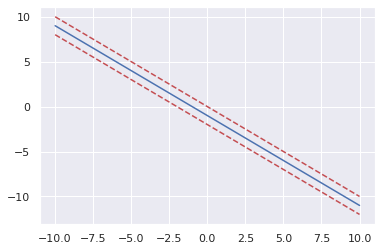

In [ ]:
W = np.ones(3)
plot_lines(*W)

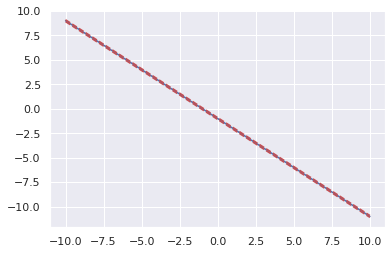

In [ ]:
W = 10 * np.ones(3)
plot_lines(*W)

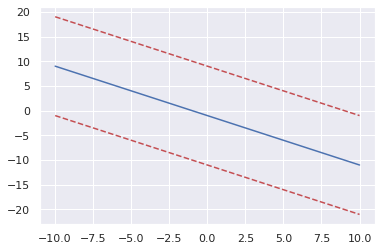

In [ ]:
W = 0.1 * np.ones(3)
plot_lines(*W)

Si también queremos evitar cualquier violación de margen, es decir, no permitir que hayan instancias dentro del margen, entonces necesitamos que la función de decisión sea mayor que 1 para todas las instancias de entrenamiento positivo y menor que –1 para instancias de entrenamiento negativo.

Así, en el caso separable, la solución del SVM, que es un hiperplano que maximiza el margen mientras clasifica correctamente todos los puntos de entrenamiento, puede expresarse como la solución al siguiente problema de optimización convexo:

\begin{equation}
\underset{W}{\text{min}} \left\{ \frac{1}{2}||W||^2\right\}
\end{equation}

sujeto a la condición:

\begin{equation}
t_i(W^T \cdot X) \geq 1
\end{equation}



con la cual se exige que los puntos estén por fuera del margen.

## **Clasificador lineal de margen suave**

Hay dos problemas principales con la clasificación de margen fuerte: Primero, solo funciona si los datos son linealmente separables y, segundo, es bastante sensible a valores atípicos.

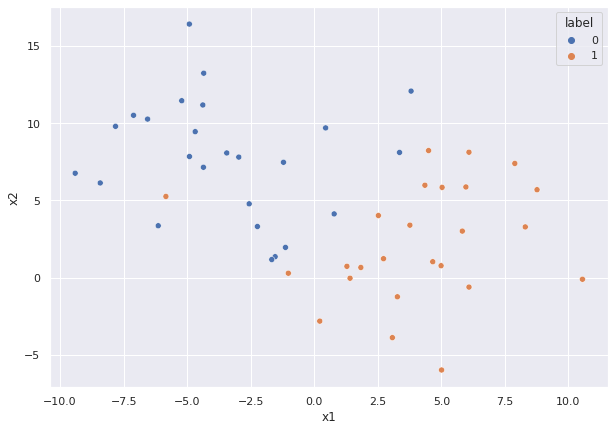

In [ ]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=4, random_state=42)

df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="x1", y="x2", hue="label");

Para evitar estos problemas, es preferible utilizar un modelo más flexible. El objetivo es encontrar un buen equilibrio entre mantener el margen lo más grande posible y limitar las violaciones de margen. Esto se llama *clasificación de margen suave*.

Para obtener el margen suave, necesitamos introducir una nueva variable $\xi_i \geq 0$ para cada instancia. $\xi_i$ mide cuánto se le permite a la i-ésima instancia violar el margen. 

Ahora tenemos dos objetivos en conflicto: hacer que las variables $\xi_i$ sean lo más pequeñas posible para reducir las violaciones del margen y hacer que $\frac{1}{2}||W||^2$ sea lo más pequeño posible para aumentar el margen. Aquí es donde entra en juego el hiperparámetro $C$: nos permite definir el balance entre estos dos objetivos. 


Lo anterior nos definie el siguiente problema de optimiización restringido:


\begin{equation}
\underset{W, \xi}{\text{min}} \left\{ \frac{1}{2}||W||^2 + C \sum_i \xi_i\right\}
\end{equation}

sujeto a las condiciones:

\begin{equation}
t_i(W^T \cdot X_i) \geq 1 - \xi_i \; \; ; \; \; \xi_i \geq 0
\end{equation}

Lo anterior define lo que se conoce como un *problema de programación cuadrática* (QP), ya que involucra un problema problema de optimización convexo con condiciones lineales. 

Podemos entrenar un modelo como estos con métodos de optimización, por ejemplo el gradiente descendente, minimizando la siguiente función de costo

$$J(W) = \frac{1}{2}||W||^2 + C \sum_i^{n}\max\left[0, 1-t_i(W^T \cdot X_i)\right]$$


Desafortunadamente, optimizar esta función de costo converge mucho más lentamente que los métodos basados ​​en QP. El segundo término de la función de costo se conoce como la función *hinge*:


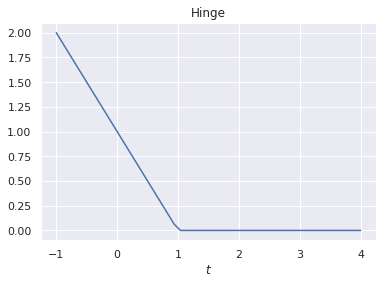

In [ ]:
x = np.linspace(-1, 4)
y = [max([0, 1-t]) for t in x]

plt.plot(x, y, label = "$y =  max(0, 1-t)$")
plt.xlabel("$t$")
plt.title("Hinge");

In [ ]:
from sklearn.svm import LinearSVC
LinearSVC?

In [ ]:
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

X, y = make_blobs(n_samples= 50, n_features= 2 ,
                  centers=2, cluster_std=4, random_state = 42)

def plot_svm(C = 1):
  X_scaled = StandardScaler().fit_transform(X)

  model = LinearSVC(C = C, loss= 'hinge').fit(X_scaled, y)

  w0 = model.intercept_[0]
  w1, w2 = model.coef_[0]

  plt.figure(figsize = (10,7))
  plot_decision_regions(X_scaled, y, model)

  ax = plt.gca()

  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()

  x = np.linspace(xmin, xmax)
  m , b, b1, b2 = get_params( w0, w1, w2)

  yy = b + m * x
  y1 = b1 + m * x
  y2 = b2 + m * x

  ax.plot(x, yy)
  ax.plot(x, y1, 'k--')
  ax.plot(x, y2, 'k--')
  ax.set_ylim(ymin, ymax)
  ax.set_title(f"C = {C}")




La clase LinearSVC regulariza el término de sesgo, por lo que primero debemos centrar el conjunto de entrenamiento restando su media. Esto es automático si estandarizamos los datos. Además, debemos establecer el hiperparámetro `loss="hinge"`, ya que no es el valor predeterminado.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


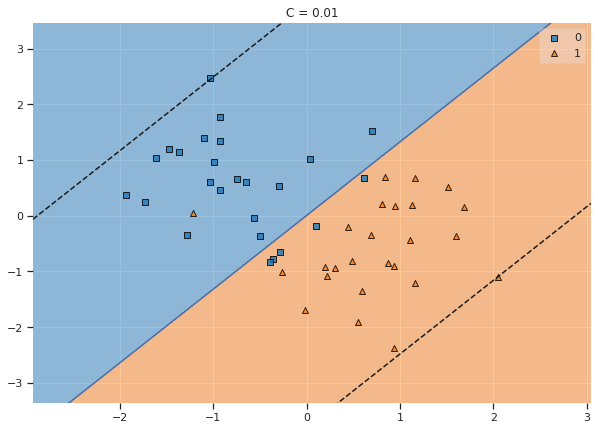

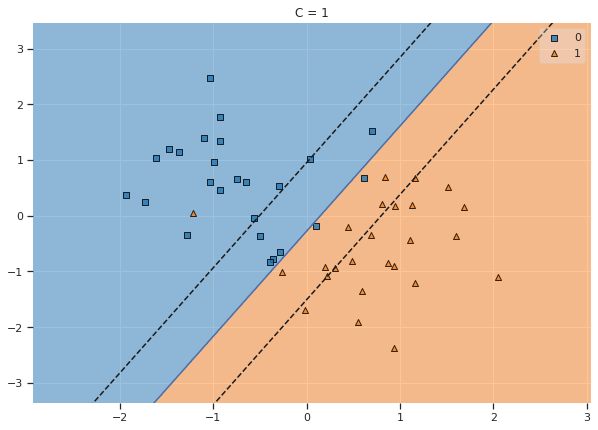

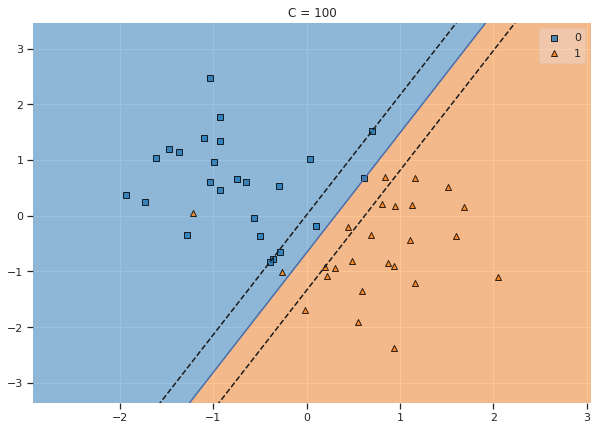

In [ ]:
for C in [0.01, 1, 100]:
  plot_svm(C)

# **SVM No lineal**

Aunque los clasificadores SVM lineales son eficientes y funcionan sorprendentemente bien en muchos casos, muchos conjuntos de datos ni siquiera están cerca de ser separables linealmente. ¿Qué hacer en estos casos?

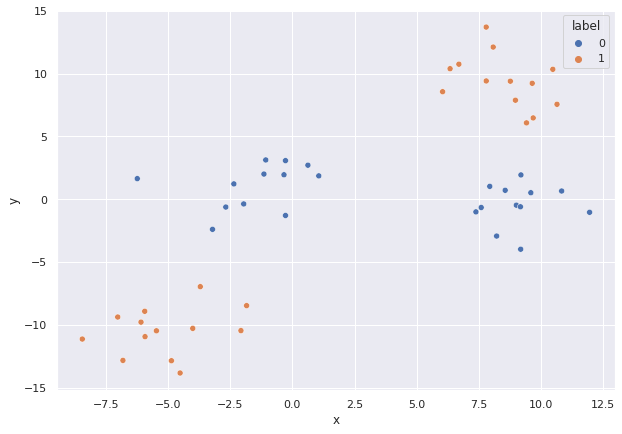

In [ ]:
centers = [(-5, -10), (9,10), (-1,0), (9,0)]

X, y = make_blobs(n_samples= 50, n_features= 2 ,
                  centers= centers, cluster_std = 2, random_state = 42)

y = np.array([1 if label == 0 or label == 1 else 0 for label in y])
df = pd.DataFrame(dict(x = X[:,0], y = X[:,1], label = y))

plt.figure(figsize=(10, 7))
sns.scatterplot(data = df, x = "x", y = "y", hue= "label");

Un enfoque para manejar conjuntos de datos no lineales es agregar más características, como características polinomiales.



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


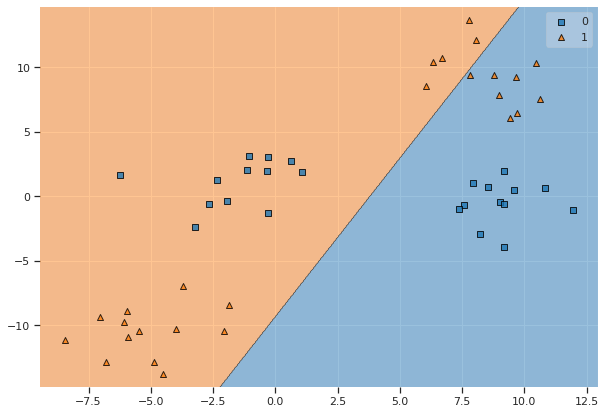

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),
                      LinearSVC()).fit(X, y)

plt.figure(figsize=(10, 7))
plot_decision_regions(X, y, model)
                      

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


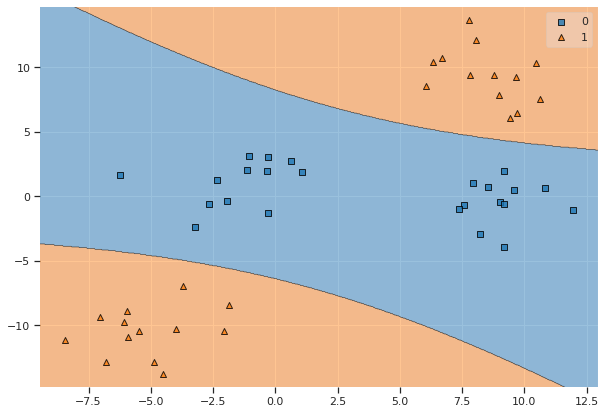

In [ ]:
model = make_pipeline(StandardScaler(),
                      PolynomialFeatures(),
                      LinearSVC()).fit(X, y)

plt.figure(figsize=(10, 7))
plot_decision_regions(X, y, model)

Agregar características polinomiales es simple de implementar y puede funcionar muy bien con todo tipo de algoritmos de ML (no solo SVM), pero en un grado de polinomio bajo no se pueden manejar conjuntos de datos muy complejos y con un grado de polinomio alto se crea una gran cantidad de características, haciendo que el modelo sea demasiado lento.



**Problema dual**

Dado un problema de optimización restringido, conocido como problema primario, es posible expresar un problema diferente pero estrechamente relacionado, llamado problema dual.

* Primal problem

\begin{equation}
\underset{W, \xi}{\text{min}} \left \{  \frac{1}{2}||W||^2 +C\sum_i \xi_i \right \}
\end{equation}

\begin{equation}
t_i(W^T \cdot X + w_0) \geq 1 - \xi_i
\end{equation}

* Dual problem
\begin{equation}
\underset{\alpha}{\text{max}}\left \{  \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^{T} \cdot \mathbf{x}_j)  \right \}
\end{equation}

\begin{equation}
0 \leq \alpha_i \leq C \; \; \; ; \; \; \; \sum_i \alpha_i y_i = 0
\end{equation}

Ambos problemas están relacionados por
\begin{equation}
W = \sum_i \alpha_iy_i \mathbf{x}_i
\end{equation}

El problema dual es más rápido de resolver que el primario cuando el número de instancias de entrenamiento es menor que el número de características. Más importante aún, hace posible el truco del kernel, mientras que el primario no lo hace. Entonces, ¿qué es este truco del kernel?

## **SVM con Kernel**

Afortunadamente, al utilizar SVM, podemos aplicar una técnica matemática casi milagrosa llamada *truco del kernel*. Este hace posible obtener el mismo resultado que si agregaran muchas características polinomiales, incluso con polinomios de muy alto grado, sin tener que agregarlas. El resultado será estrictamente el mismo que si se transformara el conjunto de entrenamiento y luego se ajustara un algoritmo de SVM lineal, pero este truco hace que todo el proceso sea mucho más eficiente computacionalmente. Ésta es la esencia del truco del kernel.


En Machine Learning, un kernel es una función capaz de calcular el producto escalar $\phi(a)^T \cdot \phi(b)$ basándose únicamente en los vectores originales $a$ y $b$, sin tener que calcular (o incluso conocer) la transformación $\phi$.










\begin{equation}
\phi(X_i)^T \cdot \phi(X_j) = K(X_i, X_j)
\end{equation}


Algunos kernels son:

* Lineal:
\begin{equation}
K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \cdot \mathbf{b}
\end{equation}

* Polynomial:
\begin{equation}
K(\mathbf{a}, \mathbf{b}) = (\gamma \mathbf{a}^T \cdot \mathbf{b} + r)^d
\end{equation}

* Gaussian RBF: 
\begin{equation}
K(\mathbf{a}, \mathbf{b}) = \exp(-\gamma ||\mathbf{a} - \mathbf{b}||^2)
\end{equation}


In [ ]:
from sklearn.svm import SVC
SVC?

In [ ]:
def svm_k(**kwargs):
  
  model = make_pipeline(StandardScaler(),
                        SVC(**kwargs)).fit(X, y)

  plt.figure(figsize=(10,7))
  plot_decision_regions(X, y, model)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


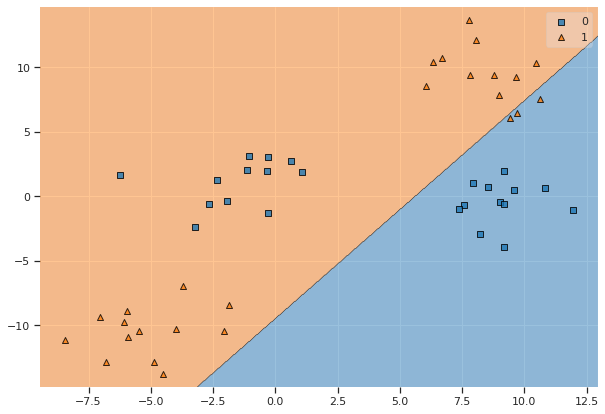

In [ ]:
svm_k(kernel = 'linear')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


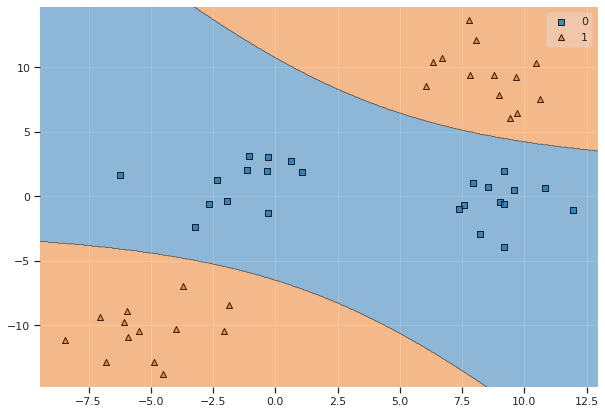

In [ ]:
svm_k(kernel = "poly", degree = 2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


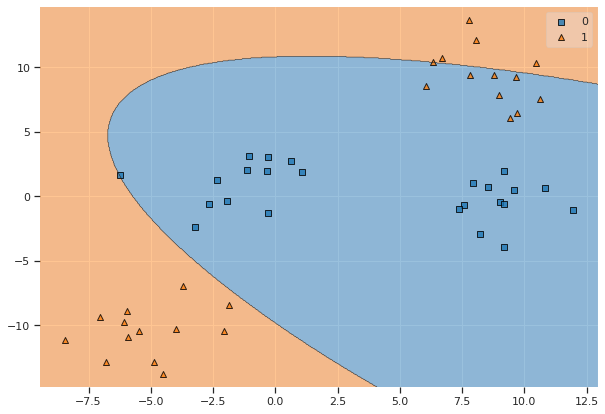

In [ ]:
svm_k(kernel = 'rbf', gamma = 0.05)